<a href="https://colab.research.google.com/github/kcw0331/Environmental-Health-Big-Data-Analysis/blob/main/5%EC%A3%BC%EC%B0%A8/R4ds_2(2021_10_05).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R for Data Science 실습 2 - Data wrangling and programing

## Data Wrangling (tidyr)

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Example datasets

In [2]:
table1

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [3]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [4]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [5]:
table4a # N. cases #하나의 variable이 2개로 나뉘어져 있다.

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


In [6]:
table4b # N. population

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583


* table들을 실행시켜준다.

## pivot_longer() 

One variable might be spread across multiple columns

Apply pivot_longer() to table4a

In [7]:
table4a %>% 
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")
#두개를 합쳐주고 싶으면 c('1999', '2000')이렇게 적어주고, names_to 해서 이름을 적어주고 values_to해서 값을 적어준다.

country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


apply it to table4b

In [8]:
table4b %>% 
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")
#table4b와 같은 경우도 values_to를 만들어주면 table이 정리 된것을 볼 수 있다.

country,year,population
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Afghanistan,2000,20595360
Brazil,1999,172006362
Brazil,2000,174504898
China,1999,1272915272
China,2000,1280428583


Join two tables

In [9]:
tidy4a <- table4a %>% 
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")
tidy4b <- table4b %>% 
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")
left_join(tidy4a, tidy4b)
#tidy4a와 tidy4b를 위와 똑같이 해준다음에 left_join을 사용해서 합쳐준다.
#left_join을 사용해서 tidy4b를 tidy4a에 붙여준다.

Joining, by = c("country", "year")



country,year,cases,population
<chr>,<chr>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


### Q: What is right_join? try ?right_join and study join methods

In [10]:
# inner_join() 함수는 두 데이터간 공통적으로 속하는 사례만 출력한다.
inner_join(tidy4a, tidy4b)

Joining, by = c("country", "year")



country,year,cases,population
<chr>,<chr>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [11]:
# right_join()함수는 두번째 input되는 데이터 사례와 공통적으로 속하는 사례들이 미포함되어 출력이 된다.
right_join(tidy4a, tidy4b)

Joining, by = c("country", "year")



country,year,cases,population
<chr>,<chr>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [12]:
# full_join() 함수는 두데이터에서 최소 한 번 이상 등장하는 사례(합집합 개념이다.)
full_join(tidy4a, tidy4b)

Joining, by = c("country", "year")



country,year,cases,population
<chr>,<chr>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


# 교수님이 join method는 **꼭** 공부해보라고 하심.
* 'inner_join()' : includes all rows in 'x' and 'y'.
* 'left_join()' : includes all rows in 'x'.
* 'right_join()' : includes all rows in 'y'.
* 'full_join()' : includes all rows in 'x' or 'y'.

## Pivot_wider()

One observation might be scattered across multiple rows

* 우리가 사용할 데이터는 table2의 데이터이다.
* Afghanistan을 보았을 때, cases와 population이 두개로 나뉘어 져서 저장이되어 있는 것을 볼 수 있다.

In [13]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [14]:
table2 %>% pivot_wider(names_from = type, values_from = count)
#새로만들어지는 names_from을 type에서 가지고 온다라는 것이고, values_from을 count에서 가지고 온다는 것이다.

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## Separating and Uniting 

## separate()

One column contains two variables 

* 하나의 열에 두개의 변수가 있는 경우이다.

In [15]:
table3 

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [16]:
table3 %>% separate(rate, into = c("cases", "population"))

country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


* 위에서의 문제점은 cases와 population을 나눠주게 되면, chr이 되기 때문에 분석을 할때는 이 부분을 바꾸어 주어야 한다.

In [17]:
table3 %>% separate(rate, into = c("cases", "population")) %>% mutate(cases = as.numeric(cases), population = as.numeric(population))

country,year,cases,population
<chr>,<int>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


* 그래서 mutate와 as.numeric을 사용해서 chr를 dbl로 바꾸어 주었다.

In [18]:
table3 %>% separate(rate, into = c("cases", "population"), sep="[^[:alnum:]]+")
#이게 regular expression이다.->[^[:alnum:]]+ 이게 all numeric이 아닌거를 말한다.
#즉, 이 말은 알파벳과 숫자가 아닌 것을 찾는다는 말이다.

country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


# 관심있는 학생들은 regular expression을 공부해보는 것도 좋다고 하심.

## unite()

Single variable is spread across multiple columns

* century와 year이 두개로 나누어져 있다.

In [19]:
table5

,country,century,year,rate
,<chr>,<chr>,<chr>,<chr>
1,Afghanistan,19,99,745/19987071
2,Afghanistan,20,00,2666/20595360
3,Brazil,19,99,37737/172006362
4,Brazil,20,00,80488/174504898
5,China,19,99,212258/1272915272
6,China,20,00,213766/1280428583


In [20]:
table5 %>% 
  unite(new, century, year, sep = "")
# new라는 변수를 하나 만들어서 century와 year를 합쳐준다.
#그리고 합칠 때, 그 사이의 간격이 없이 합쳐라 하는게 sep = ""이다.

country,new,rate
<chr>,<chr>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


# Functional Programming

* 먼저 dataframe으로 a,b,c,d를 만들어 준다.

In [21]:
df <- tibble(
  a = rnorm(10),
  b = rnorm(10),
  c = rnorm(10),
  d = rnorm(10)
)

In [22]:
df

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
-0.66965206,2.2539076,-0.4590117,2.22017909
0.85799028,0.8660978,0.5213642,0.82856794
-0.73851727,-0.5414870,-1.3615227,2.00355265
-0.76377123,-1.8550256,0.8904737,-0.39878288
-0.02655807,-0.4366914,0.7921534,-0.09769141
0.50761604,0.1957154,1.9454137,-0.48990103
-0.88094193,0.1536855,-0.5268303,0.50902105
0.67308545,-0.6280134,-0.6431293,0.12259397
-1.73959272,1.8048720,-0.7709960,0.56501637


* a,b,c,d로 정규분포에서 생성된 난수들로 생성된것을 볼 수 있다.

In [23]:
median(df$a)
#> [1] -0.2457625
median(df$b)
#> [1] -0.2873072
median(df$c)
#> [1] -0.05669771
median(df$d)
#> [1] 0.1442633

[1] -0.7040847

[1] 0.1747004

[1] -0.492921

[1] 0.3158075

Don't copy and paste multiple times  
You can iterate using for loops


* 그래서 For loops으로 코딩을 하는게 좀 더 효율적이다.

In [28]:
output <- vector("double", ncol(df))  # 1. output  처음에는 공간을 먼저 만들어 준다.
for (i in seq_along(df)) {            # 2. sequence
  output[[i]] <- median(df[[i]])      # 3. body
}
output


[1] -0.7040847  0.1747004 -0.4929210  0.3158075

In [29]:
output <- c()  #이렇게 공간을 잡아 놓지 않고 For loops를 돌려주게 되면 비효율적이라고 말씀하심.
output


NULL

In [33]:
output <- c()   #여기 이부분에서는 공간을 잡아 두지 않고 들어오는 것마다 더해주는 형식으로 만들어 둔 것이다.
for (i in seq_along(df)) {            # 2. sequence
  output <- c( output, median(df[[i]]) )      # 3. body
}
output


[1] -0.7040847  0.1747004 -0.4929210  0.3158075

In [34]:
install.packages("rbenchmark")  #속도가 빠른지 아닌지 benchmark를 돌려보기 위해서 rbenchmark를 사용한 것이다.
library(rbenchmark)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [35]:

simple1 <- function(n) {
  output <- vector("double", n)  #공간을 잡아놓은 경우.
  for(i in 1:n) 
    output[i] = i
  return(output)
} 

simple2 <- function(n) {
  output <- c()  #공간을 잡아 놓지 않은 경우.
  for(i in 1:n) 
    output = c(output, i)
  return(output)
} 


In [36]:
simple1(10)

[1]  1  2  3  4  5  6  7  8  9 10

In [37]:
simple2(10)

[1]  1  2  3  4  5  6  7  8  9 10

* 숫자가 적을 때는 공간을 잡아놓은 것과 안 잡아 놓은게 차이가 없지만 숫자가 커지게 되면 benchmark로 보았을 때, 차이가 나는 것을 볼 수 있다.

In [38]:
benchmark("fc1"=simple1(1000),
          "fc2"=simple2(1000),
          replications=100,   #100번씩 replications을 해주게 된다.
          columns=c('test', 'elapsed', 'replications'))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.006,100
2,fc2,0.222,100


* fc1은 시간이 소모되는게 0.006이라면, fc2는 시간이 소모되는게 0.201이라는 것을 알 수 있다.

* 그래서 공간을 미리 할당 해 놓는게 동적으로 잡는 것 보다는 보다 더 빠르다는 것을 알 수 있다.

In [39]:
226/6


[1] 37.66667

## for_loops vs functional

Possible to wrap up for loops in a function


* 함수 안에서 For loops을 담는 방법이다.

In [40]:
col_mean <- function(df) {
  output <- vector("double", ncol(df)) 
  for (i in seq_along(df)) {
    output[[i]] <- mean(df[[i]])
  }
  output
}

col_median <- function(df) {
  output <- vector("double", ncol(df)) 
  for (i in seq_along(df)) {
    output[[i]] <- median(df[[i]])
  }
  output
}

col_sd <- function(df) {
  output <- vector("double", ncol(df)) 
  for (i in seq_along(df)) {
    output[[i]] <- sd(df[[i]])
  }
  output
}

col_mean(df)

[1] -0.3608153  0.2552626 -0.1211017  0.4586954

You can make function as a variable

* function을 variable로 잡아서 하는 방법이 있다.

In [42]:
col_summary <- function(df, fun) {
  out <- vector("double", length(df))
  for (i in seq_along(df)) {
    out[i] <- fun(df[[i]])
  }
  out
}
col_summary(df, median)


[1] -0.7040847  0.1747004 -0.4929210  0.3158075

## The map function (purrr)

the purrr package provides a family of functions for looping patterns over a vector

remind apply()

In [43]:
str(df)

tibble [10 × 4] (S3: tbl_df/tbl/data.frame)
 $ a: num [1:10] -0.6697 0.858 -0.7385 -0.7638 -0.0266 ...
 $ b: num [1:10] 2.254 0.866 -0.541 -1.855 -0.437 ...
 $ c: num [1:10] -0.459 0.521 -1.362 0.89 0.792 ...
 $ d: num [1:10] 2.2202 0.8286 2.0036 -0.3988 -0.0977 ...


In [44]:
df

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
-0.66965206,2.2539076,-0.4590117,2.22017909
0.85799028,0.8660978,0.5213642,0.82856794
-0.73851727,-0.5414870,-1.3615227,2.00355265
-0.76377123,-1.8550256,0.8904737,-0.39878288
-0.02655807,-0.4366914,0.7921534,-0.09769141
0.50761604,0.1957154,1.9454137,-0.48990103
-0.88094193,0.1536855,-0.5268303,0.50902105
0.67308545,-0.6280134,-0.6431293,0.12259397
-1.73959272,1.8048720,-0.7709960,0.56501637


In [45]:
df %>% map_dbl(mean)  #map안에는 함수가 들어가서 각각의 vector에 함수가 적용된다.

a          b          c          d 
-0.3608153  0.2552626 -0.1211017  0.4586954

* 결과들이 numeric vector들로 나열이 되어 있는 것을 볼 수 있다.

In [46]:
df %>% map(mean)

$a
[1] -0.3608153

$b
[1] 0.2552626

$c
[1] -0.1211017

$d
[1] 0.4586954

* 일반적으로 map(mean)을 사용하게 되면, list형태로 나열이 되는 것을 알 수 있다.

In [47]:
df %>% map_dbl(median)

a          b          c          d 
-0.7040847  0.1747004 -0.4929210  0.3158075

In [49]:
df %>% map_dbl(sd)

a         b         c         d 
0.8306888 1.2185833 1.1173814 0.9991283

In [48]:
mtcars 
#mtcars는 자동차에 대한 데이터가 있는 것으 볼 수 있다.

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [50]:
mtcars %>% 
  split(.$cyl)
#mtcars에서 cyl로 split을 해주게 되면, cyl로 나뉘어 지는 것을 알 수 있다.

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2


You can define a function in map

In [51]:
#먼저 함수function을 정의해주고
f1 <- function(df) {
  lm(mpg ~ wt, data = df)
}

#split한 것을 f1에 집어넣어 주는 방식이다.
mtcars %>% 
  split(.$cyl) %>% 
  map(f1) #map을 해주게 되면 list형식으로 만들어 준다.

$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [52]:
#근데 위에서 처럼 함수 function을 다른 곳에서 정의해서 써주는 방식이 아니라
#map안에서 function을 정해서 사용해주는 방법도 있다.
mtcars %>% 
  split(.$cyl) %>% 
  map(function(df) lm(mpg ~ wt, data = df)) #function을 map안에다가 써줄 수 있다.


$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [53]:
f1 <- function(df) {
  lm(mpg ~ wt, data = df)
}
mtcars %>% 
  split(.$cyl) %>% 
  map(f1)

$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [54]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .))
#이 방법 처럼 ~를 해준 다음에 데이터가 들어갈 장소에는 .을 해주는 방법도 있다.

$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [55]:
df %>% map_dbl(mean)

a          b          c          d 
-0.3608153  0.2552626 -0.1211017  0.4586954

In [56]:
df %>% map_dbl(~mean(.))
#mean이란 함수에 .안의 데이터를 사용해라 하는 것이다.
# ~표시하고 .을 한 방법이 위에 적어 놓은 코드랑 비슷하다는 것을 알 수 있다.

a          b          c          d 
-0.3608153  0.2552626 -0.1211017  0.4586954

## Extract Component

In [57]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .)) %>% 
  map(summary) 
#이렇게 하면 cyl더 별로 lm돌린거의 summary가 정리 된 것을 볼 수 있다.

$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1513 -1.9795 -0.6272  1.9299  5.2523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   39.571      4.347   9.104 7.77e-06 ***
wt            -5.647      1.850  -3.052   0.0137 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.332 on 9 degrees of freedom
Multiple R-squared:  0.5086,	Adjusted R-squared:  0.454 
F-statistic: 9.316 on 1 and 9 DF,  p-value: 0.01374


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Residuals:
     Mazda RX4  Mazda RX4 Wag Hornet 4 Drive        Valiant       Merc 280 
       -0.1250         0.5840         1.9292        -0.6897         0.3547 
     Merc 280C   Ferrari Dino 
       -1.0453        -1.0080 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   28.409      4.184   6.789  0.00105 **
wt            -2.780      1.335  -2.083  0.09176 . 
---
Signif.

In [58]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .)) %>% 
  map(summary) %>% 
  map_dbl(~.$r.squared)
#summary에서 r.squared를 추출하고 싶은 것이다.

4         6         8 
0.5086326 0.4645102 0.4229655

In [59]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .)) %>% 
  map(summary) %>% 
  map_dbl('r.squared') #이렇게 변수명을 호출해줘서 뽑아내주는 방법도 있다.


4         6         8 
0.5086326 0.4645102 0.4229655

You can also use an integer to select elements by position

* 위치 정보를 쳤을 때도 위치의 값을 뽑아 내 준다는 것을 알 수 있다.

In [61]:
x <- list(list(1, 2, 3), list(4, 5, 6), list(7, 8, 9))
x %>% map_dbl(2)
#> [1] 2 5 8


[1] 2 5 8

* map_dbl(2)를 하게 되면, list에 두번째꺼만 뽑아내 주는 것을 알 수 있다.

In [62]:
x

[[1]]
[[1]][[1]]
[1] 1

[[1]][[2]]
[1] 2

[[1]][[3]]
[1] 3


[[2]]
[[2]][[1]]
[1] 4

[[2]][[2]]
[1] 5

[[2]][[3]]
[1] 6


[[3]]
[[3]][[1]]
[1] 7

[[3]][[2]]
[1] 8

[[3]][[3]]
[1] 9

Functional Programming is memory efficient by not saving internal calculations. Easier to understand if you get used to it. 

Is it fater as well? 

* 교수님이 For loops한게 것보다 Functional Programming을 한게 더 빠를지 한 번 해본 것이다.

In [63]:
n_len = 10

In [64]:
rep(10,n_len)  #10개의 10으로 구성된 벡터를 만들었다.

[1] 10 10 10 10 10 10 10 10 10 10

* map과 같은게 tidy에서 사용하는 map function함수이다.

In [65]:
rep(10,n_len) %>% map(rnorm) #그럼 각각의 component들이 rnorm안에 들어가게 끔해준다.

[[1]]
 [1] -0.5379695  0.2179766 -0.7158670 -0.6953687 -1.1348121  0.5599007
 [7] -1.6815741  1.5977406  0.2320241 -0.2403005

[[2]]
 [1] -1.0856519 -0.3222989 -0.3422397  0.4256958 -1.0316564 -0.5708526
 [7] -0.2393295  0.2403320  1.0301419  1.3492682

[[3]]
 [1]  1.3296650 -1.2943837  1.4889971 -1.1102600 -0.9745706  1.3692284
 [7]  0.9917543  0.4815053  1.2100055  1.2333910

[[4]]
 [1] -0.4208991  1.3816134 -0.9125707  0.8353234  2.1207026  0.6322801
 [7] -0.4984814 -1.0050580 -0.7853079  0.2383634

[[5]]
 [1]  0.7193020  0.9016706 -0.2411966  1.2869804  0.5969977  0.7224255
 [7]  1.9973396  0.2549785 -0.5114970  0.5868531

[[6]]
 [1]  0.4538627 -1.5640717  0.9186204  0.8559113 -0.7912917 -0.2153125
 [7]  0.3975411  1.1731968  2.1818624 -0.8386720

[[7]]
 [1] -0.06692267 -0.34060224 -0.01975590  1.73575339  0.17623605  0.50086182
 [7] -1.22085827  1.06954355 -0.85606973 -1.11645875

[[8]]
 [1] -1.58200804  0.82985631 -0.04846428  0.14876852  2.48710238  0.30067378
 [7]  0.72966625 -1.22209713 -0.28715287 -1.62875714

[[9]]
 [1] -0.8780552 -1.8642387 -0.1248344 -0.2813899 -0.2156018  0.4371840
 [7]  0.3252019  0.5703771  1.3556495  0.5239170

[[10]]
 [1] -1.07812005 -0.90868028 -0.28271517 -1.45966470 -0.00337333 -0.41757865
 [7]  0.08448391 -0.69724039  0.96205229  0.58956404

In [67]:
df2 <- vector(mode = "list", length = n_len)
for (i in 1:n_len)
  df2[[i]] <- rnorm(10)
df2

[[1]]
 [1]  0.03762591 -1.45641907  0.48320804 -0.71985835  1.27908210  0.54578825
 [7] -0.80507408  0.25190695 -0.58861716  0.34956523

[[2]]
 [1]  0.8902504  0.6173491 -0.3981226 -0.6094695  0.7670591  0.8462346
 [7]  0.5775212  0.7350345  0.5384220 -0.6110352

[[3]]
 [1]  0.3184579  0.7726675  1.1398558 -1.5570850  0.3668499 -2.1022352
 [7] -1.2419723 -0.1539095  1.1553951 -0.7581311

[[4]]
 [1] -1.3556350 -0.4142594 -0.2264697  1.5470264  1.3522256  0.3624575
 [7] -1.2942098 -1.2077249  0.6613326 -0.5446584

[[5]]
 [1]  0.723766642 -1.235304538  0.009151907 -2.537743492  0.176520951
 [6]  0.664913260 -0.020134925  0.315071571  0.879372417 -0.561128421

[[6]]
 [1] -0.16193713 -0.49835271  2.10968094 -1.41552089  0.10540889 -0.02277739
 [7] -0.47956235 -0.10644125 -0.04577037 -0.16559126

[[7]]
 [1] -1.0218421  0.6557548 -0.7234024 -0.8841588 -1.0805433  0.5024495
 [7] -1.1149948 -0.4232931 -0.7699422  0.3747811

[[8]]
 [1] -1.6445323  0.5948948  0.5819029  0.3812846 -1.4114449  0.7398728
 [7]  0.2522330 -0.4450606  1.0376832 -0.7217622

[[9]]
 [1] -0.1357635 -1.2601148 -0.7385406 -0.6971970  0.9165830 -0.2454797
 [7]  0.1992524  1.3503189 -0.5808397  1.7633986

[[10]]
 [1] -0.1097023  2.6672147 -0.3790138  2.2594046  0.6738796 -1.0713258
 [7] -0.4916779  1.3856719  0.5534345  0.5655879

In [68]:
lapply(rep(10,n_len), rnorm )

#R에서 사용되는 방식인 lapply를 사용할 수 도 있다.

[[1]]
 [1] -0.2338871 -0.6266295  1.6047522  1.9338574 -1.1479080  0.2856769
 [7] -0.8801385 -0.1917225 -1.4093874 -0.6624300

[[2]]
 [1]  0.2098612  0.1317570  0.4174949 -0.8497830  0.4372654 -0.6209892
 [7]  0.4419658 -1.2069900 -1.1224608  1.6125197

[[3]]
 [1] -0.2693493 -0.8583192  1.7682842 -0.2189911 -0.3828420  0.9731765
 [7]  0.2612885  0.5653325 -0.3332962  0.8000331

[[4]]
 [1]  0.1627741 -0.3320655  0.1678926  1.6321286 -0.1791075 -1.2575679
 [7] -0.3062099  0.9054420 -0.9729912  0.7647384

[[5]]
 [1]  0.40432791 -0.36128686  1.02504552 -1.98230523  0.48484341 -0.07460451
 [7] -0.72968323  0.74635730 -1.08388680 -0.05176666

[[6]]
 [1] -1.62208883 -1.39521175  1.82922814  0.67979579 -0.59628562 -0.60891163
 [7] -1.61982062  0.06003691  0.75961915 -2.10050053

[[7]]
 [1]  0.02885699  0.54221650  0.50042638 -0.24430703  0.17588801 -1.06021364
 [7]  0.77068878 -1.19070247 -0.01895209  0.35679871

[[8]]
 [1] -0.99779146 -1.44275401  0.55724556  0.36259371  0.99954278 -1.21859511
 [7]  0.10976892  0.02135961 -0.95530529 -0.68491380

[[9]]
 [1] -0.7345966 -1.3112886 -0.7954818 -0.7645249  0.6426392 -1.5739847
 [7]  0.3671779 -0.4483209  0.2239915 -0.3854401

[[10]]
 [1] -0.84622108 -0.45749019  0.84021935 -1.27209053  0.89755673 -0.24442763
 [7] -2.31399341  0.79730311  0.01000203  0.64759626

In [69]:
gen1 <- function(n_len) {
  rep(10,n_len) %>% map(rnorm)
}

In [70]:
gen2 <- function(n_len) {
  df2 <- vector(mode = "list", length = n_len)
  for (i in 1:n_len)
    df2[[i]] <- rnorm(10)
  df2
}

In [71]:
gen3 <- function(n_len) {
  lapply(rep(10,n_len), rnorm )
}

In [72]:
gen2(10)

[[1]]
 [1] -0.3254902 -0.8583542 -0.5748439  0.5387072  0.1306721 -1.8697687
 [7] -1.2794124  0.5191905  0.9300118  0.2074486

[[2]]
 [1] -2.6480371 -0.8925457 -0.5949227 -0.6893264  0.3068516 -0.6777407
 [7] -0.7383081  0.8676232  0.5451284  1.3089208

[[3]]
 [1] -0.98899343  1.18526696  0.68126507 -0.25214986 -1.39752001 -0.28508506
 [7] -0.14383327 -0.07902179  0.55940009  1.49104002

[[4]]
 [1]  0.1920145 -0.4856054 -1.5880658 -1.2385222 -1.6431450  0.7576614
 [7] -0.6125991  0.3936418  1.4146476 -1.7601807

[[5]]
 [1] -0.88309330 -0.30290025  1.70950510  0.47358956 -0.79868008  0.07027113
 [7] -1.07597898  0.63361831  1.14555992  0.16146953

[[6]]
 [1] -0.02601171  1.93898661  1.24646488  0.22213255  0.74357439 -0.66502061
 [7] -0.31897175 -0.21405409  1.07179391 -0.75439074

[[7]]
 [1]  0.3852673  1.3961771  0.9322527 -0.3161087  0.7068668  0.7422381
 [7]  1.1617516 -1.0595034  1.2257563  1.0799481

[[8]]
 [1]  1.88038076 -0.79872784 -0.24092645 -0.09638959 -0.69995442  0.37929635
 [7]  1.51822896 -0.72300231 -0.47660296  2.10052180

[[9]]
 [1] -1.166586212  0.331095336  0.001961166  0.938449023 -0.269258720
 [6] -0.253681417  0.180998462 -2.961602066 -1.086993811 -0.602920515

[[10]]
 [1] -2.10743315  1.20958385  1.92663166 -0.20005044 -0.19214901  0.79245421
 [7]  1.06433819  0.97435352  0.02034439 -1.00457654

In [73]:
benchmark("fc1"=gen1(1000),
          "fc2"=gen2(1000),
          "fc3"=gen3(1000),
          replications=100,
          columns=c('test', 'elapsed', 'replications'))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.502,100
2,fc2,0.436,100
3,fc3,0.479,100


* functional같은 경우는 속도 면에서는 차이가 없지만 사용하기는 간단하게 되어 있다.

# Something useful

In [74]:
diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


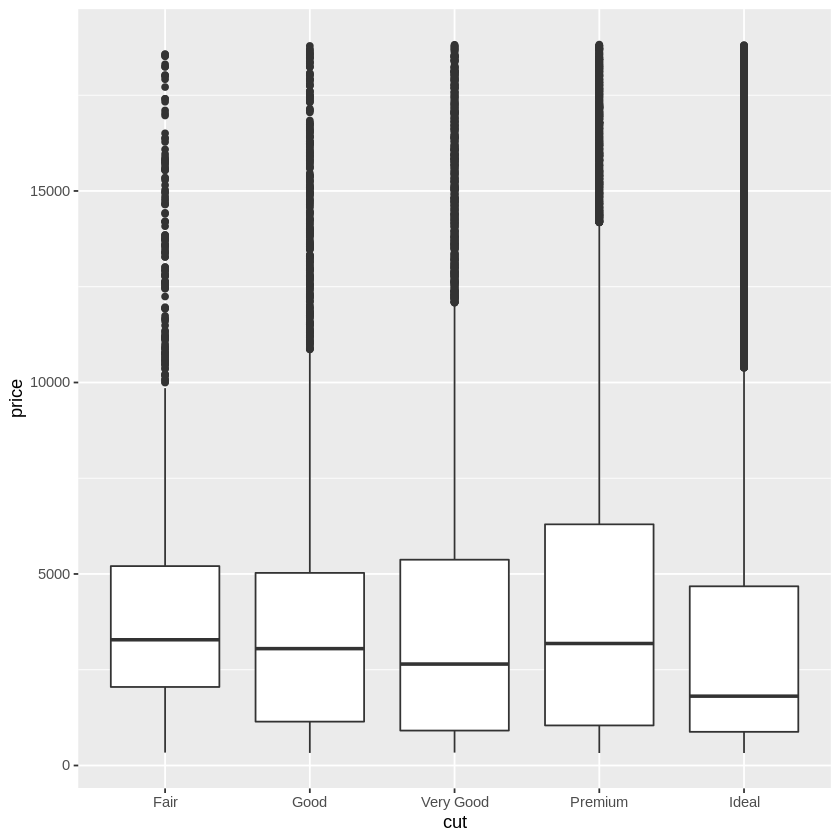

In [75]:
diamonds %>% ggplot(aes(cut, price)) + geom_boxplot()

* 가격과 같은 경우는 치우쳐져 있는 경우가 많아서 그럴 경우는 box-plot보다는 violin-plot을 사용하는게 더 효과적이다.

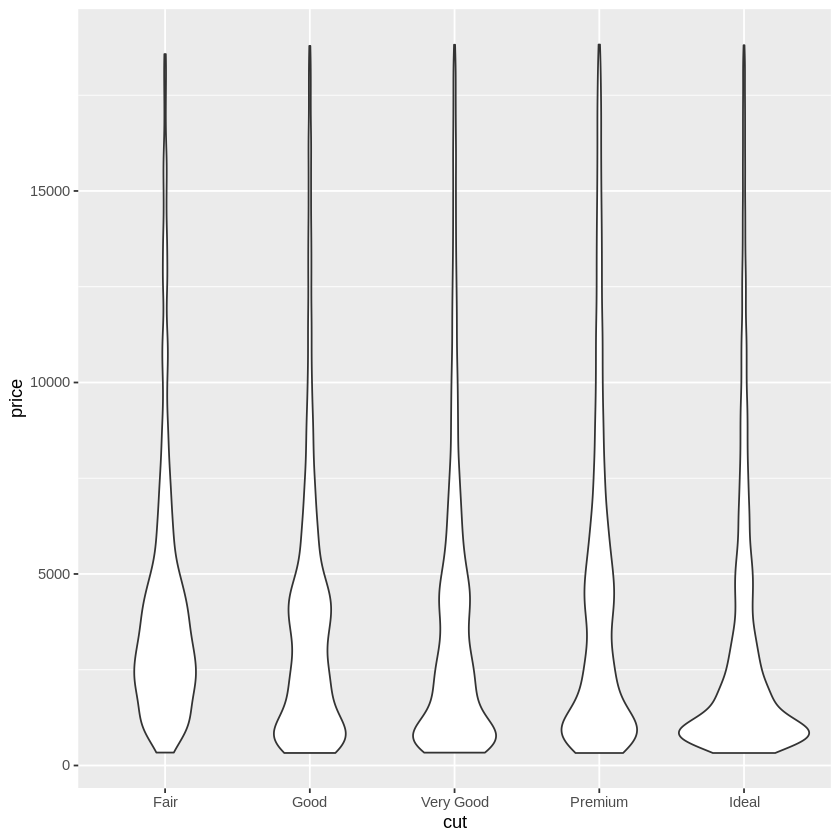

In [76]:
diamonds %>% ggplot(aes(cut, price)) + geom_violin() 

* violin-plot만 그러주기 좀 그럴 때는 violin-plot안에 box-plot을 넣어 주는 경우도 있다.

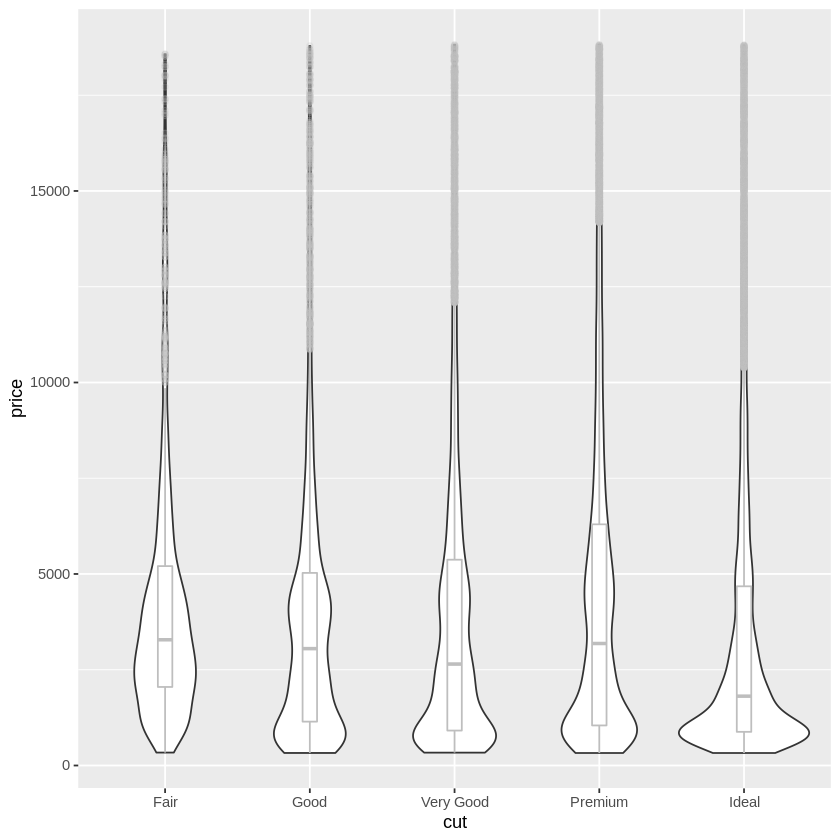

In [77]:
diamonds %>% ggplot(aes(cut, price)) + geom_violin() + geom_boxplot(width=0.1, color="grey", alpha=0.2)  